# Train Q-learning agent on Taxi-v3

This notebook reuses `backend/taxi/rl_agent.py` to train a simple Q-learning agent, then reports basic metrics and shows a sample successful trajectory.

In [1]:
import sys,os

os.environ["DEEPSEEK_API_KEY"] = "sk-86b6aa7eaab04dbb9462fd7ef0b2b873" 

In [2]:
# If running on Colab, install dependencies

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip -q install -U gymnasium==0.26.2 numpy

# Ensure backend is importable
repo_root = os.getcwd()
backend_path = os.path.join(repo_root, 'backend')
if backend_path not in sys.path:
    sys.path.append(backend_path)

In [3]:
import json
import numpy as np
from rl_agent import QLearningAgent, solve_taxi_v3_and_collect_data
import gymnasium as gym
# Train the agent with configurable episodes
EPISODES = 20000
ALPHA = 0.1
GAMMA = 0.99
EPSILON = 1.0
EPS_DECAY = 0.995
EPS_MIN = 0.01

env = gym.make('Taxi-v3')
agent = QLearningAgent(env, alpha=ALPHA, gamma=GAMMA, epsilon=EPSILON, epsilon_decay=EPS_DECAY, epsilon_min=EPS_MIN)
successful_episodes, reward_history = agent.train(episodes=EPISODES) 
env.close()
total_success = len(successful_episodes)
avg_success_reward = float(np.mean([ep['total_reward'] for ep in successful_episodes])) if successful_episodes else 0.0
print('Successful episodes:', total_success)
print('Average reward among successes:', avg_success_reward)

# Save to JSON for downstream analysis or explanation generation
with open('rl_successful_episodes.json', 'w') as f:
    json.dump(successful_episodes, f, indent=2)
print('Saved to rl_successful_episodes.json')

Episode 1000/20000 completed. Epsilon: 0.0100
Episode 2000/20000 completed. Epsilon: 0.0100
Episode 3000/20000 completed. Epsilon: 0.0100
Episode 4000/20000 completed. Epsilon: 0.0100
Episode 5000/20000 completed. Epsilon: 0.0100
Episode 6000/20000 completed. Epsilon: 0.0100
Episode 7000/20000 completed. Epsilon: 0.0100
Episode 8000/20000 completed. Epsilon: 0.0100
Episode 9000/20000 completed. Epsilon: 0.0100
Episode 10000/20000 completed. Epsilon: 0.0100
Episode 11000/20000 completed. Epsilon: 0.0100
Episode 12000/20000 completed. Epsilon: 0.0100
Episode 13000/20000 completed. Epsilon: 0.0100
Episode 14000/20000 completed. Epsilon: 0.0100
Episode 15000/20000 completed. Epsilon: 0.0100
Episode 16000/20000 completed. Epsilon: 0.0100
Episode 17000/20000 completed. Epsilon: 0.0100
Episode 18000/20000 completed. Epsilon: 0.0100
Episode 19000/20000 completed. Epsilon: 0.0100
Episode 20000/20000 completed. Epsilon: 0.0100
Successful episodes: 19766
Average reward among successes: 4.43984620

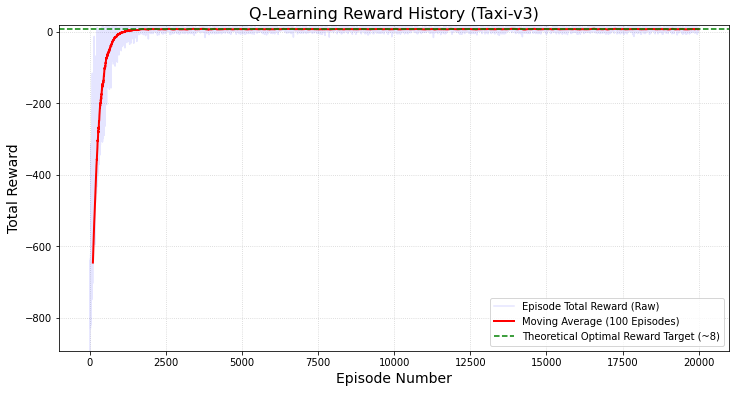

In [4]:
import matplotlib.pyplot as plt
import numpy as np # Note: np must be imported in your Notebook before this block

# Set window size for smoothing
window_size = 100 
    
# Calculate the moving average
# Note: 'reward_history' must be defined before this block runs
moving_avg = np.convolve(reward_history, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))

# Plot raw episode rewards (low transparency)
plt.plot(np.arange(len(reward_history)), reward_history, alpha=0.1, color='blue', label='Episode Total Reward (Raw)') 

# Plot the smoothed moving average curve
plt.plot(np.arange(len(moving_avg)) + window_size - 1, moving_avg, color='red', linewidth=2, label=f'Moving Average ({window_size} Episodes)') 

plt.title('Q-Learning Reward History (Taxi-v3)', fontsize=16)
plt.xlabel('Episode Number', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)

# Add the theoretical optimal reward target line
plt.axhline(y=8, color='green', linestyle='--', label='Theoretical Optimal Reward Target (~8)')

plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
# Adjust Y limit based on actual data minimum
plt.ylim(min(reward_history), 20) 
plt.show()

In [5]:
# Optional: generate natural-language explanations using backend.llm.explanation_generator
from explanation_generator import generate_explanation_for_rl_steps
try:
    explanations = generate_explanation_for_rl_steps(successful_episodes[:3])
    print('Generated', len(explanations), 'explanations. Example:')
    explanations[0] if explanations else {}
except Exception as e:
    print('Explanation generation skipped due to error:', e)

Generated 3 explanations. Example:


In [6]:
explanations

[{'episode': 21,
  'total_reward': -634.0,
  'steps': [{'state': {'taxi_position': '(2, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
     'raw_state': 287},
    'action': 4,
    'reward': -10.0},
   {'state': {'taxi_position': '(2, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
     'raw_state': 287},
    'action': 4,
    'reward': -10.0},
   {'state': {'taxi_position': '(2, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
     'raw_state': 287},
    'action': 0,
    'reward': -1.0},
   {'state': {'taxi_position': '(3, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
     'raw_state': 387},
    'action': 5,
    'reward': -10.0},
   {'state': {'taxi_position': '(3, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
     'raw_state': 387},
    'action': 4,
    'reward': -10.0},
   {'state': {'taxi_position': '(3, 4)',
     'passenger_location': 'Green',
     'destination': 'Blue',
    